In [1]:
!pip install wfdb


  Using cached matplotlib-3.7.4-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.7 kB)
Using cached matplotlib-3.7.4-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [2]:
import wfdb



/home/vishal/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
!pip install matplotlib==3.1.3



  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.4
    Uninstalling matplotlib-3.7.4:
      Successfully uninstalled matplotlib-3.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wfdb 4.1.2 requires matplotlib>=3.2.2, but you have matplotlib 3.1.3 which is incompatible.


In [4]:
import keras
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import random
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import copy
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import precision_score,recall_score,accuracy_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
import scipy.io
from scipy.io import savemat
# Random Initialization
random.seed(42)

In [5]:
import zipfile
with zipfile.ZipFile('archive(1).zip', 'r') as zip_ref:
    zip_ref.extractall('mit-bih-arrhythmia-database')


In [6]:
with zipfile.ZipFile('archive(2).zip', 'r') as zip_ref:
    zip_ref.extractall('mitbih-normal-sinus-rhythm-database')


/home/vishal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


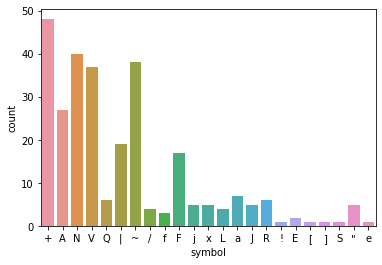

In [7]:
import os
import wfdb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = 'mit-bih-arrhythmia-database/'  # Change this if your folder structure is different
patients = ['100','101','102','103','104','105','106','107',
            '108','109','111','112','113','114','115','116',
            '117','118','119','121','122','123','124','200',
            '201','202','203','205','207','208','209','210',
            '212','213','214','215','217','219','220','221',
            '222','223','228','230','231','232','233','234']

dataframe = pd.DataFrame()

for pts in patients:
    # Generating filepath for all .atr file names
    file = data + pts
    # Saving annotation object
    annotation = wfdb.rdann(file, 'atr')
    # Extracting symbols from the object
    sym = annotation.symbol
    # Saving value counts
    values, counts = np.unique(sym, return_counts=True)
    # Writing data points into dataframe
    df_sub = pd.DataFrame({'symbol': values, 'Counts': counts, 'Patient Number': [pts] * len(counts)})
    # Concatenating all data points
    dataframe = pd.concat([dataframe, df_sub], axis=0)

ax = sns.countplot(dataframe['symbol'])
plt.show()

In [8]:
!pip install --upgrade pandas


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [9]:
dataframe

,symbol,Counts,Patient Number
0,+,1,100
1,A,33,100
2,N,2239,100
3,V,1,100
0,+,1,101
...,...,...,...
0,+,3,234
1,J,50,234
2,N,2700,234
3,V,3,234


In [10]:
nonbeat = ['[','!',']','x','(',')','p','t','u','`',
           '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?']

# Abnormal Beat Symbols
abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

# Normal Beat Symbols
normal = ['N'] 
    


In [11]:
# Classifying normal, abnormal or nonbeat
dataframe['category'] = -1
dataframe.loc[dataframe.symbol == 'N','category'] = 0
dataframe.loc[dataframe.symbol.isin(abnormal), 'category'] = 1    
      
dataframe.groupby('category').Counts.sum()


category
-1     3186
 0    75052
 1    34409
Name: Counts, dtype: int64

In [12]:
#removing the non-beat from dataframe
dataframe = dataframe.loc[~((dataframe['category']==-1))]
dataframe.groupby('category').Counts.sum()

category
0    75052
1    34409
Name: Counts, dtype: int64

In [13]:
def load_ecg(file):    
    # load the ecg
    record = wfdb.rdrecord(file)
    # load the annotation
    annotation = wfdb.rdann(file, 'atr')
    
    # extracting the signal
    p_signal = record.p_signal

    # extracting symbols and annotation index
    atr_sym = annotation.symbol
    atr_sample = annotation.sample
    
    return p_signal, atr_sym, atr_sample
    

In [14]:
def build_XY(p_signal, df_ann, num_cols, normal):
    # this function builds the X,Y matrices for each beat
    # it also returns the original symbols for Y
    
    num_rows = len(df_ann)

    X = np.zeros((num_rows, num_cols))
    Y = np.zeros((num_rows,1))
    sym = []
    
    # keep track of rows
    max_row = 0

    for atr_sample, atr_sym in zip(df_ann.atr_sample.values,df_ann.atr_sym.values):

        left = max([0,(atr_sample - num_sec*fs) ])
        right = min([len(p_signal),(atr_sample + num_sec*fs) ])
        x = p_signal[left: right]
        if len(x) == num_cols:
            X[max_row,:] = x
            Y[max_row,:] = int(atr_sym in normal)
            sym.append(atr_sym)
            max_row += 1
    X = X[:max_row,:]
    Y = Y[:max_row,:]
    return X,Y,sym

In [15]:
# creating abnormal beat dataset
def make_dataset(pts, num_sec, fs, abnormal):
    # function for making dataset ignoring non-beats
    # input:
    #   pts - list of patients
    #   num_sec = number of seconds to include before and after the beat
    #   fs = frequency
    # output: 
    #   X_all = signal (nbeats , num_sec * fs columns)
    #   Y_all = binary is abnormal (nbeats, 1)
    #   sym_all = beat annotation symbol (nbeats,1)
    
    # initialize numpy arrays
    num_cols = 2*num_sec * fs
    X_all = np.zeros((1,num_cols))
    Y_all = np.zeros((1,1))
    sym_all = []
    
    # list to keep track of number of beats across patients
    max_rows = []
    
    for pt in pts:
        file = data + pt
        
        p_signal, atr_sym, atr_sample = load_ecg(file)
        
        # grab the first signal
        p_signal = p_signal[:,0]
        
        # make df to exclude the nonbeats
        df_ann = pd.DataFrame({'atr_sym':atr_sym,
                              'atr_sample':atr_sample})
        df_ann = df_ann.loc[df_ann.atr_sym.isin(abnormal)]
        
        X,Y,sym = build_XY(p_signal,df_ann, num_cols, abnormal)
        sym_all = sym_all+sym
        max_rows.append(X.shape[0])
        X_all = np.append(X_all,X,axis = 0)
        Y_all = np.append(Y_all,Y,axis = 0)
        
    # drop the first zero row
    X_all = X_all[1:,:]
    Y_all = Y_all[1:,:]

    return X_all, Y_all, sym_all

In [16]:
# Parameter Values
num_sec = 1
fs = 360

X_abnormal, Y_abnormal, sym_abnormal = make_dataset(patients, num_sec, fs, abnormal)


In [17]:
data= 'mitbih-normal-sinus-rhythm-database/mit-bih-normal-sinus-rhythm-database-1.0.0/'



In [18]:
patients = ["16265","16272"]


In [19]:
# creating normal beat dataset
def make_dataset(pts, num_sec, fs, normal):
    # function for making dataset ignoring non-beats
    # input:
    #   pts - list of patients
    #   num_sec = number of seconds to include before and after the beat
    #   fs = frequency
    # output: 
    #   X_all = signal (nbeats , num_sec * fs columns)
    #   Y_all = binary is abnormal (nbeats, 1)
    #   sym_all = beat annotation symbol (nbeats,1)
    
    # initialize numpy arrays
    num_cols = 2*num_sec * fs
    X_all = np.zeros((1,num_cols))
    Y_all = np.zeros((1,1))
    sym_all = []
    
    # list to keep track of number of beats across patients
    max_rows = []
    
    for pt in pts:
        file = data + pt
        
        p_signal, atr_sym, atr_sample = load_ecg(file)
        
        # grab the first signal
        p_signal = p_signal[:,0]
        
        # make df to exclude the nonbeats
        df_ann = pd.DataFrame({'atr_sym':atr_sym,
                              'atr_sample':atr_sample})
        df_ann = df_ann.loc[df_ann.atr_sym.isin(normal)]
        
        X,Y,sym = build_XY(p_signal,df_ann, num_cols, normal)
        sym_all = sym_all+sym
        max_rows.append(X.shape[0])
        X_all = np.append(X_all,X,axis = 0)
        Y_all = np.append(Y_all,Y,axis = 0)
        
    # drop the first zero row
    X_all = X_all[1:,:]
    Y_all = Y_all[1:,:]

    return X_all, Y_all, sym_all


In [20]:
# Parameter Values
num_sec = 1
fs = 360

X_normal, Y_normal, sym_normal = make_dataset(patients, num_sec, fs, normal)


In [21]:
X_normal = X_normal[0:34376,:]

Y_normal = np.zeros((34376, 1))



In [22]:
X = np.append(X_normal,X_abnormal,axis=0)
Y = np.append(Y_normal,Y_abnormal,axis=0)
X = X[:,0:140]

In [23]:
raw_data= np.append(X, Y, axis=1)
raw_data = pd.DataFrame(raw_data)

# The last element contains the labels
labels = raw_data.iloc[: , -1]
labels= labels.values
# The other data points are the electrocadriogram data
data = raw_data.iloc[:, 0:-1]
data= data.values

In [24]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
test_data = scaler.transform(test_data)
train_data = scaler.transform(train_data)


train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [25]:
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]

anomalous_train_data = train_data[train_labels]
anomalous_test_data = test_data[test_labels]

val_df, test_df = train_test_split(
  test_data,
  test_size=0.2, 
  random_state=42)

In [26]:
test_labels =  ~test_labels


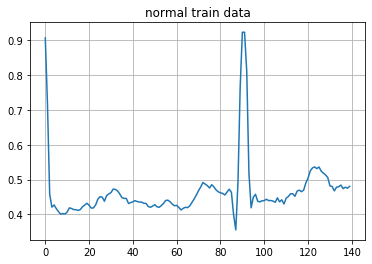

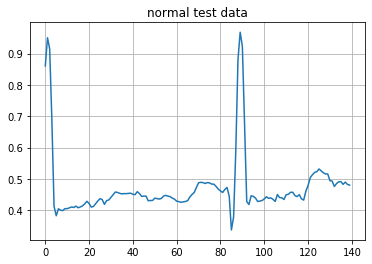

In [27]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("normal train data")
plt.show()

plt.grid()
plt.plot(np.arange(140), normal_test_data[543])
plt.title("normal test data")
plt.show()

#normal


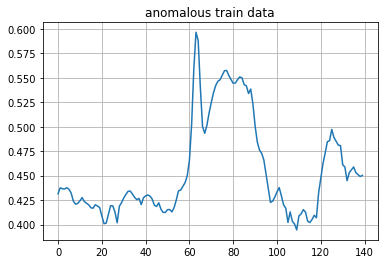

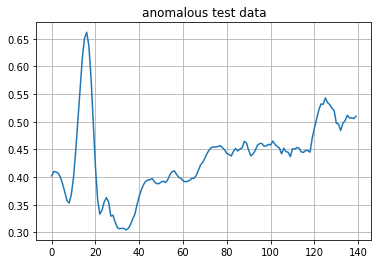

In [28]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("anomalous train data")
plt.show()

plt.grid()
plt.plot(np.arange(140), anomalous_test_data[0])
plt.title("anomalous test data")
plt.show()

#abnormal


In [29]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
])
    self.decoder = tf.keras.Sequential([

      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [30]:
autoencoder.compile("adam", loss="mean_absolute_error")

In [31]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=1500, 
          batch_size=128,
          validation_data=(normal_test_data, normal_test_data),
          shuffle=True)


Epoch 1/1500
216/216 [==============================] - 2s 5ms/step - loss: 0.0420 - val_loss: 0.0346
Epoch 2/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0345 - val_loss: 0.0342
Epoch 3/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0341 - val_loss: 0.0338
Epoch 4/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0336 - val_loss: 0.0334
Epoch 5/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0333 - val_loss: 0.0329
Epoch 6/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0329 - val_loss: 0.0330
Epoch 7/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0325 - val_loss: 0.0322
Epoch 8/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0318 - val_loss: 0.0315
Epoch 9/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0308 - val_loss: 0.0302
Epoch 10/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.030

216/216 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.0212
Epoch 81/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0209 - val_loss: 0.0219
Epoch 82/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.0215
Epoch 83/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.0223
Epoch 84/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0211 - val_loss: 0.0233
Epoch 85/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0213 - val_loss: 0.0211
Epoch 86/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0207 - val_loss: 0.0216
Epoch 87/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0208 - val_loss: 0.0216
Epoch 88/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0207 - val_loss: 0.0219
Epoch 89/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0206 - v

216/216 [==============================] - 1s 3ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 160/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0187 - val_loss: 0.0197
Epoch 161/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0186 - val_loss: 0.0195
Epoch 162/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0186 - val_loss: 0.0205
Epoch 163/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0188 - val_loss: 0.0189
Epoch 164/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0192
Epoch 165/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0186 - val_loss: 0.0197
Epoch 166/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0185 - val_loss: 0.0188
Epoch 167/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 168/1500
216/216 [==============================] - 0s 2ms/step - loss: 0

Epoch 238/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0179 - val_loss: 0.0183
Epoch 239/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0176 - val_loss: 0.0177
Epoch 240/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0175 - val_loss: 0.0195
Epoch 241/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0177 - val_loss: 0.0185
Epoch 242/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0186
Epoch 243/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0175 - val_loss: 0.0193
Epoch 244/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0177 - val_loss: 0.0193
Epoch 245/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0177 - val_loss: 0.0180
Epoch 246/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0174 - val_loss: 0.0184
Epoch 247/1500
216/216 [==============================] - 1s 3ms

Epoch 317/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0165 - val_loss: 0.0167
Epoch 318/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0165 - val_loss: 0.0180
Epoch 319/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0181
Epoch 320/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0167 - val_loss: 0.0191
Epoch 321/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0168 - val_loss: 0.0190
Epoch 322/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0168 - val_loss: 0.0168
Epoch 323/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0165 - val_loss: 0.0177
Epoch 324/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 325/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0162 - val_loss: 0.0185
Epoch 326/1500
216/216 [==============================] - 1s 2ms

Epoch 396/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0160 - val_loss: 0.0162
Epoch 397/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.0169
Epoch 398/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0160 - val_loss: 0.0169
Epoch 399/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0160 - val_loss: 0.0163
Epoch 400/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0160 - val_loss: 0.0161
Epoch 401/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0157 - val_loss: 0.0170
Epoch 402/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0161 - val_loss: 0.0167
Epoch 403/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0159 - val_loss: 0.0165
Epoch 404/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0160 - val_loss: 0.0161
Epoch 405/1500
216/216 [==============================] - 0s 2ms

Epoch 475/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0156 - val_loss: 0.0159
Epoch 476/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0156 - val_loss: 0.0177
Epoch 477/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0158 - val_loss: 0.0178
Epoch 478/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0157 - val_loss: 0.0176
Epoch 479/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0157 - val_loss: 0.0161
Epoch 480/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0168
Epoch 481/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0157 - val_loss: 0.0167
Epoch 482/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0155 - val_loss: 0.0163
Epoch 483/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0156 - val_loss: 0.0160
Epoch 484/1500
216/216 [==============================] - 1s 2ms

Epoch 554/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0152 - val_loss: 0.0159
Epoch 555/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0155 - val_loss: 0.0160
Epoch 556/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0153 - val_loss: 0.0170
Epoch 557/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0158 - val_loss: 0.0166
Epoch 558/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0155
Epoch 559/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.0165
Epoch 560/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0153 - val_loss: 0.0159
Epoch 561/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 562/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0153
Epoch 563/1500
216/216 [==============================] - 1s 2ms

Epoch 633/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0155
Epoch 634/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0149 - val_loss: 0.0156
Epoch 635/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0152
Epoch 636/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0149 - val_loss: 0.0184
Epoch 637/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0153 - val_loss: 0.0155
Epoch 638/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0165
Epoch 639/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 640/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0164
Epoch 641/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0151 - val_loss: 0.0152
Epoch 642/1500
216/216 [==============================] - 0s 2ms

Epoch 712/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0159
Epoch 713/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0161
Epoch 714/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0165
Epoch 715/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 716/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0146 - val_loss: 0.0150
Epoch 717/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0160
Epoch 718/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0148 - val_loss: 0.0182
Epoch 719/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0155 - val_loss: 0.0156
Epoch 720/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0165
Epoch 721/1500
216/216 [==============================] - 1s 3ms

Epoch 791/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0162
Epoch 792/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0146 - val_loss: 0.0166
Epoch 793/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 794/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0144 - val_loss: 0.0161
Epoch 795/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0148
Epoch 796/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0144 - val_loss: 0.0151
Epoch 797/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0155
Epoch 798/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0156
Epoch 799/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0149
Epoch 800/1500
216/216 [==============================] - 0s 2ms

Epoch 870/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0144 - val_loss: 0.0145
Epoch 871/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0150
Epoch 872/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0152
Epoch 873/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0156
Epoch 874/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0144 - val_loss: 0.0155
Epoch 875/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0148
Epoch 876/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0143 - val_loss: 0.0158
Epoch 877/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0152
Epoch 878/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0148
Epoch 879/1500
216/216 [==============================] - 1s 2ms

216/216 [==============================] - 1s 2ms/step - loss: 0.0145 - val_loss: 0.0150
Epoch 949/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0142 - val_loss: 0.0150
Epoch 950/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0141 - val_loss: 0.0158
Epoch 951/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0143 - val_loss: 0.0147
Epoch 952/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0140 - val_loss: 0.0151
Epoch 953/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0141 - val_loss: 0.0153
Epoch 954/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0143 - val_loss: 0.0148
Epoch 955/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0143 - val_loss: 0.0155
Epoch 956/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0145 - val_loss: 0.0152
Epoch 957/1500
216/216 [==============================] - 1s 2ms/step - loss: 0

216/216 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0140
Epoch 1027/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0137 - val_loss: 0.0141
Epoch 1028/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0138 - val_loss: 0.0141
Epoch 1029/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0137 - val_loss: 0.0140
Epoch 1030/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0138 - val_loss: 0.0146
Epoch 1031/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0141 - val_loss: 0.0141
Epoch 1032/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.0146
Epoch 1033/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.0141
Epoch 1034/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0139 - val_loss: 0.0163
Epoch 1035/1500
216/216 [==============================] - 1s 2ms/step 

216/216 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0147
Epoch 1105/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0139 - val_loss: 0.0145
Epoch 1106/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0139 - val_loss: 0.0162
Epoch 1107/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0145 - val_loss: 0.0141
Epoch 1108/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0137 - val_loss: 0.0140
Epoch 1109/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0136 - val_loss: 0.0146
Epoch 1110/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0139 - val_loss: 0.0141
Epoch 1111/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0136 - val_loss: 0.0152
Epoch 1112/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0138 - val_loss: 0.0152
Epoch 1113/1500
216/216 [==============================] - 1s 3ms/step 

216/216 [==============================] - 1s 2ms/step - loss: 0.0134 - val_loss: 0.0152
Epoch 1183/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0139 - val_loss: 0.0143
Epoch 1184/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0135 - val_loss: 0.0146
Epoch 1185/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0137 - val_loss: 0.0146
Epoch 1186/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0139 - val_loss: 0.0141
Epoch 1187/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0136 - val_loss: 0.0146
Epoch 1188/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0136 - val_loss: 0.0161
Epoch 1189/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0137 - val_loss: 0.0139
Epoch 1190/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0134 - val_loss: 0.0144
Epoch 1191/1500
216/216 [==============================] - 1s 2ms/step 

216/216 [==============================] - 1s 2ms/step - loss: 0.0136 - val_loss: 0.0143
Epoch 1261/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0134 - val_loss: 0.0140
Epoch 1262/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0134 - val_loss: 0.0144
Epoch 1263/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0135 - val_loss: 0.0138
Epoch 1264/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0134 - val_loss: 0.0150
Epoch 1265/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 1266/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0132 - val_loss: 0.0148
Epoch 1267/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 1268/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.0143
Epoch 1269/1500
216/216 [==============================] - 1s 2ms/step 

216/216 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0139
Epoch 1339/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.0146
Epoch 1340/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 1341/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0149
Epoch 1342/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.0157
Epoch 1343/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.0136
Epoch 1344/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0148
Epoch 1345/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0135 - val_loss: 0.0137
Epoch 1346/1500
216/216 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.0139
Epoch 1347/1500
216/216 [==============================] - 1s 2ms/step 

216/216 [==============================] - 1s 3ms/step - loss: 0.0134 - val_loss: 0.0159
Epoch 1417/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0137 - val_loss: 0.0140
Epoch 1418/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0133 - val_loss: 0.0134
Epoch 1419/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0132 - val_loss: 0.0139
Epoch 1420/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0132 - val_loss: 0.0145
Epoch 1421/1500
216/216 [==============================] - 1s 2ms/step - loss: 0.0133 - val_loss: 0.0141
Epoch 1422/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0132 - val_loss: 0.0149
Epoch 1423/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0133 - val_loss: 0.0141
Epoch 1424/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0133 - val_loss: 0.0137
Epoch 1425/1500
216/216 [==============================] - 1s 3ms/step 

216/216 [==============================] - 1s 3ms/step - loss: 0.0159 - val_loss: 0.0182
Epoch 1495/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0156 - val_loss: 0.0153
Epoch 1496/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0146 - val_loss: 0.0161
Epoch 1497/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0150 - val_loss: 0.0150
Epoch 1498/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0144 - val_loss: 0.0144
Epoch 1499/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0140 - val_loss: 0.0144
Epoch 1500/1500
216/216 [==============================] - 1s 3ms/step - loss: 0.0140 - val_loss: 0.0143


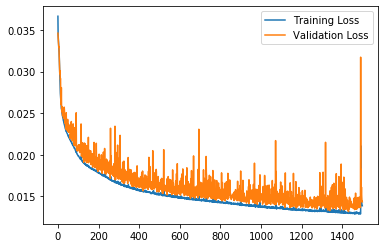

In [32]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

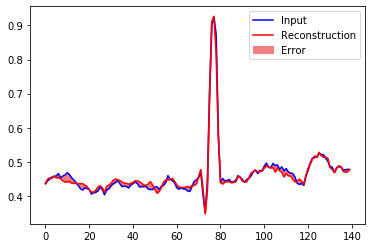

In [33]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


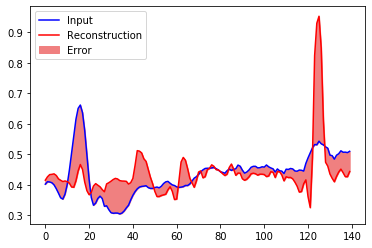

In [34]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

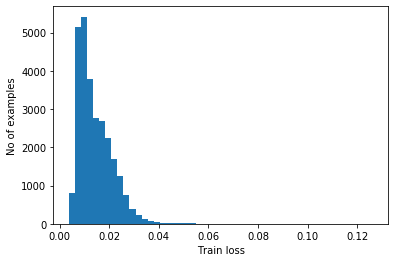

In [35]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [36]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)



Threshold:  0.02145004644270439


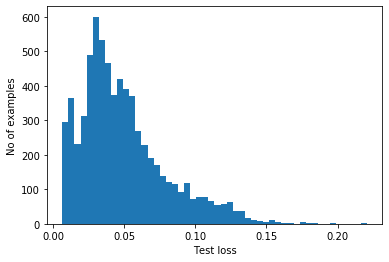

In [37]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [38]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
#test_data = test_data. numpy()

In [39]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)


Accuracy = 0.8456112282743073
Precision = 0.8472038749449582
Recall = 0.8421359789903706


/home/vishal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

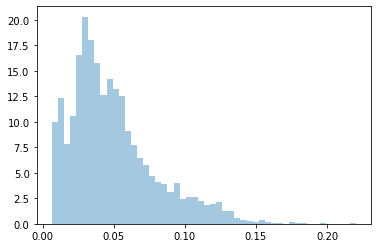

In [40]:
reconstructions = autoencoder.predict(anomalous_test_data)
train_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)
sns.distplot(train_loss, bins=50, kde=True);



In [41]:
reconstructions = autoencoder.predict(normal_test_data)
pred_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

pred_loss = pred_loss.numpy()
correct = sum(l <= threshold for l in pred_loss)
print(f'Correct normal predictions: {correct}/{len(normal_test_data)}')

Correct normal predictions: 5772/6854


In [42]:
reconstructions = autoencoder.predict(anomalous_test_data)
train_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)
train_loss = train_loss.numpy()
correct = sum(l > threshold for l in train_loss)
print(f'Correct anomaly predictions: {correct}/{len(anomalous_test_data)}')


Correct anomaly predictions: 5856/6897


In [43]:
def plot_prediction_normal(i,data, model, title, ax):
    encoded_data = autoencoder.encoder(data).numpy()
    decoded_data = autoencoder.decoder(encoded_data).numpy()
    ax.axis([0, 140, 0, 1])
  
    ax.plot(data[i], label='true')
    ax.plot(decoded_data[i], label='reconstructed')
    ax.set_title(f'{title} (loss: {np.around(1000*pred_loss[i], 2)})')
    ax.legend()

def plot_prediction_anomaly(i,data, model, title, ax):
    encoded_data = autoencoder.encoder(data).numpy()
    decoded_data = autoencoder.decoder(encoded_data).numpy()
    ax.axis([0, 140, 0, 1])
  
    ax.plot(data[i], label='true')
    ax.plot(decoded_data[i], label='reconstructed')
    ax.set_title(f'{title} (loss: {np.around(1000*train_loss[i], 2)})')
    ax.legend()

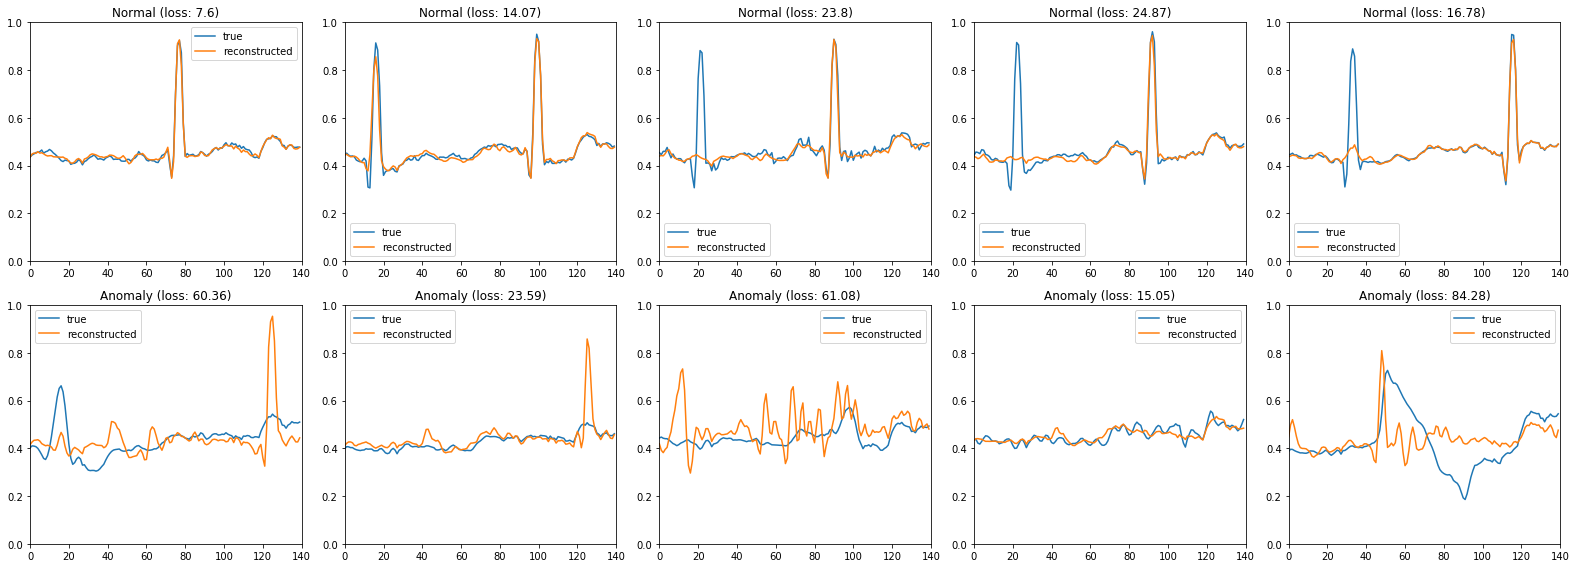

In [44]:
fig, axs = plt.subplots(
  nrows=2,
  ncols=5,
  figsize=(22, 8)
)
for i in range(5) :
  plot_prediction_normal(i,normal_test_data, autoencoder, title='Normal', ax=axs[0, i])

for i in range(5) :
  plot_prediction_anomaly(i,anomalous_test_data, autoencoder, title='Anomaly', ax=axs[1, i])
fig.tight_layout();


In [45]:
!pip install plyer

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [46]:
# Assuming 'test_value' is a single test data point
test_value = test_data[100]  # Adjust the index as needed

# Reshape the test value to match the model's input shape
test_value = test_value.reshape((1, test_value.shape[0]))

# Predict using the autoencoder model
reconstruction = autoencoder.predict(test_value)

# Calculate the mean absolute error (MAE) between the original and reconstructed values
mae = tf.keras.losses.mae(reconstruction, test_value).numpy()

# Check if the MAE is below the threshold
if mae <= threshold:
    print("Normal")
else:
    print("Anomalous")

Normal


In [47]:
test_data[100]

array([0.47017816, 0.48075412, 0.48200313, 0.48009368, 0.47792409,
       0.4771495 , 0.45943838, 0.45689655, 0.44115355, 0.43474903,
       0.44189602, 0.43669447, 0.4365019 , 0.42878903, 0.43009931,
       0.42181541, 0.42737643, 0.42630385, 0.42954032, 0.4302939 ,
       0.42477204, 0.41480339, 0.41235521, 0.42245989, 0.43288084,
       0.42964635, 0.42650419, 0.41744548, 0.42781557, 0.43448795,
       0.43543544, 0.44568452, 0.449521  , 0.44673035, 0.4437037 ,
       0.44044944, 0.43825301, 0.43806647, 0.43564356, 0.44402421,
       0.4481203 , 0.4483798 , 0.44124337, 0.44283537, 0.43969466,
       0.43458301, 0.43448276, 0.42890443, 0.42498036, 0.43138801,
       0.43249608, 0.43273013, 0.42958861, 0.42834646, 0.44071763,
       0.44763382, 0.45616757, 0.44840962, 0.45297806, 0.44031621,
       0.43221691, 0.42292171, 0.41896272, 0.43018563, 0.42822775,
       0.42248996, 0.4244373 , 0.43457573, 0.44757433, 0.45272867,
       0.46374622, 0.4742345 , 0.39612807, 0.34149963, 0.46765

In [48]:
# Assuming 'test_data' is your entire test dataset
consecutive_anomalies = 0
count = 0

for i in range(len(test_data)):
    # Assuming 'test_value' is a single test data point
    test_value = test_data[i].reshape((1, test_data[i].shape[0]))

    # Predict using the autoencoder model
    reconstruction = autoencoder.predict(test_value)

    # Calculate the mean absolute error (MAE) between the original and reconstructed values
    mae = tf.keras.losses.mae(reconstruction, test_value).numpy()

    # Check if the MAE is above the threshold
    if mae > threshold:
        consecutive_anomalies += 1
    else:
        consecutive_anomalies = 0

    # Check if more than 5 consecutive anomalies are detected
    if consecutive_anomalies > 10:
        #print("Anomaly heartbeat detected!")
        count = count + 1
        # You can add code here to send a notification

# Reset the consecutive anomaly count if needed
consecutive_anomalies = 0
print(count," Anomaly heartbeat detected!")

8  Anomaly heartbeat detected!
